<a href="https://colab.research.google.com/github/fedakhalid/DataEngineering1/blob/youssefelhini/Copy_of_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statistics



In [ ]:
df = pd.read_csv('/content/Car_sale_ads.csv',engine="python",error_bad_lines=False)

In [ ]:
df.head(10)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,62950,PLN,Used,Abarth,595,NaN,NaN,2016,46060.0,...,Manual,small_cars,3.0,gray,Germany,Yes,15/03/2016,30/04/2021,"Modlińska 157 - 03-186 Warszawa, Białołęka (Po...","['ABS', 'Electric front windows', 'Drivers air..."
6,6,69900,PLN,Used,Abarth,595,NaN,NaN,2021,2900.0,...,Manual,small_cars,2.0,black,Germany,NaN,25/02/2021,29/04/2021,"Żary, żarski, Lubuskie",[]
7,7,69900,PLN,Used,Abarth,500,NaN,NaN,2019,20000.0,...,Manual,small_cars,3.0,white,Poland,Yes,NaN,29/04/2021,"Ojcowska 2 - 02-918 Warszawa, Mokotów (Polska)","['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,120750,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,93100,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


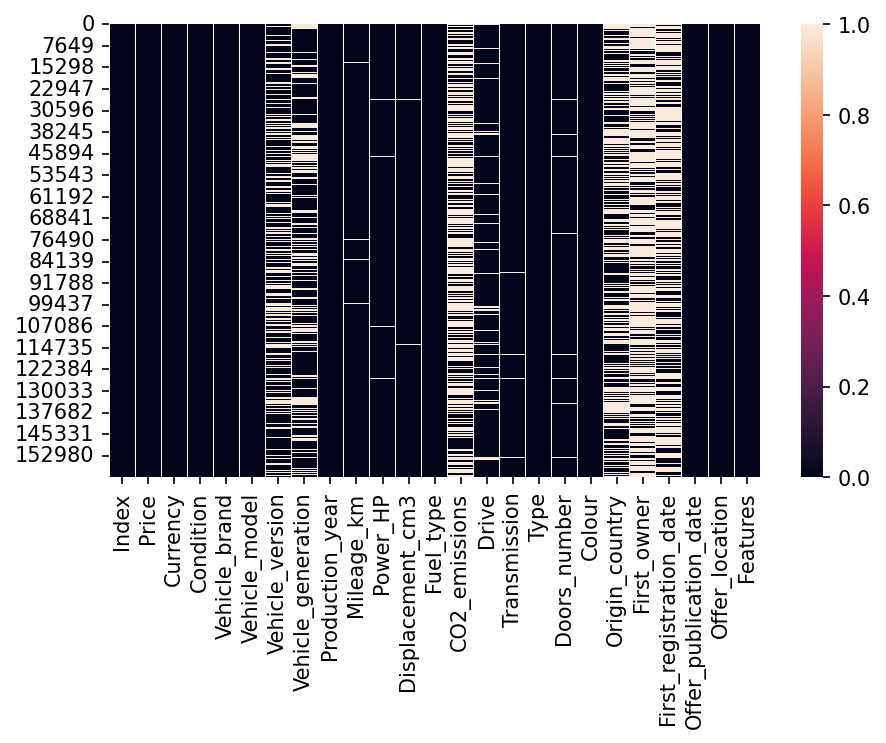

In [ ]:
plt.figure(figsize=(7,4), dpi=150)
sns.heatmap(df.isnull())


<Figure size 1500x900 with 0 Axes>

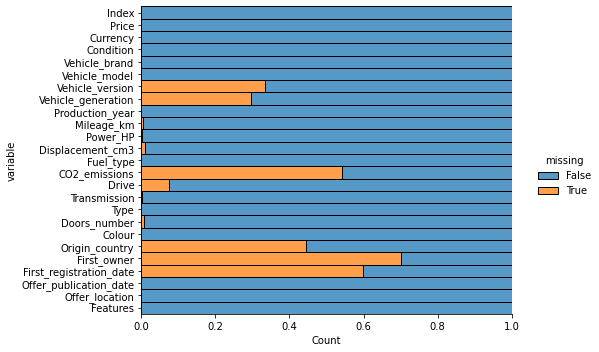

In [ ]:
plt.figure(figsize=(10,6), dpi=150)
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

The above visualizations show the missing values in the dataset. In conclusion we got 6 main attributes with more than 20% missing values: First_registration_date, First_owner, Origin_country, CO2_emissions, vehicle_version and vehicle_generation

Other attributes with less than 20% missing values are Type, Displacement_cm3, Mileage_km, Drive, Doors_number

Chcecking the percentage of the missing values in the <0.1 missing attributes and their datatypes

In [ ]:
missing_Displacement_percentage = (df.Displacement_cm3.isnull().sum()/df.shape[0])*100
print(f"{missing_Displacement_percentage}%")

print(df.Displacement_cm3.dtype)


1.002322150074396%
float64


In [ ]:
missing_Drive_percentage = (df.Drive.isnull().sum()/df.shape[0])*100
print(f"{missing_Drive_percentage}%")
print(df.Drive.dtype)


7.438350962167008%
object


In [ ]:
missing_Doors_percentage = (df.Doors_number.isnull().sum()/df.shape[0])*100
print(f"{missing_Doors_percentage}%")
print(df.Doors_number.dtype)


0.7371114445267607%
float64


In [ ]:
missing_Mileage_percentage = (df.Mileage_km.isnull().sum()/df.shape[0])*100
print(f"{missing_Mileage_percentage}%")
print(df.Mileage_km.dtype)


0.4812391441040423%
float64


Displacement, Doors_number, drive and mileage_km could be filled in using imputation since they are within an acceptable range


We will use the median to fill in Mileage and Displacement and mode to fill in doors

In [ ]:
df['Mileage_km'].fillna(df['Mileage_km'].median(), inplace = True)

In [ ]:
df['Displacement_cm3'].fillna(df['Displacement_cm3'].median(), inplace = True)

In [ ]:
df['Doors_number'].fillna(df['Doors_number'].mode()[0], inplace = True)

In [ ]:
df['Drive'].fillna(df['Drive'].mode()[0], inplace = True)

We will assume that any null value in the First owners attribute translates to No

In [ ]:
df['First_owner'].fillna('No',inplace= True)

<Figure size 1500x900 with 0 Axes>

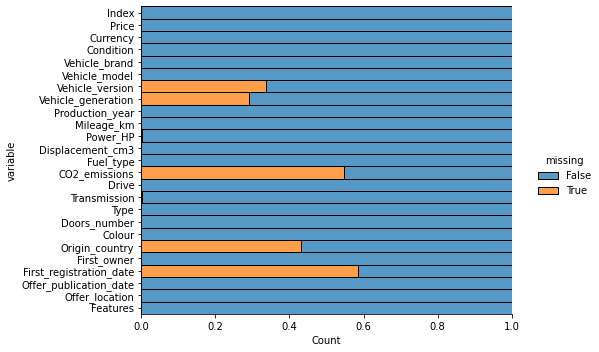

In [ ]:
plt.figure(figsize=(10,6), dpi=150)
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)


In [ ]:
#filling in the missing values of the electric cars with 0 
# ?

First_registration_date is probably mostly null due to the cars on sale already being used and many people are not the first owner (or have refrained from answering, perhaps due to not wanting to depreciate the price of the car being sold) and it could be difficult for a secondhand user to know this information. The same could apply for Origin_country

CO2 emissions is also over 50% null perhaps due to the fact that many people dont consider it important as a selling point. It is also worth mentioning that many old cars (those produced before 1990 as shown below) will most likely not have this information as it was not relevant at the time

In [ ]:
sns.pairplot(df)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fab21f8e8b0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fab20e7c4c0> (for post_execute):


KeyboardInterrupt: ignored

Observations from this pairplot:
  1) Most cars on sale were produced after 1990
  2) CO2 emission and displacement are positively correlated 
  3) Price and production year are positvely strongly correlated 
  4) Horse power and production year are positively correlated
  5) Mileage has a very low variance 
  6) Displacement and production year are positively correlated
  7) Horse power and price are positively correlated
  8) Horse Power and displacement are positively related

Correlation Matrix

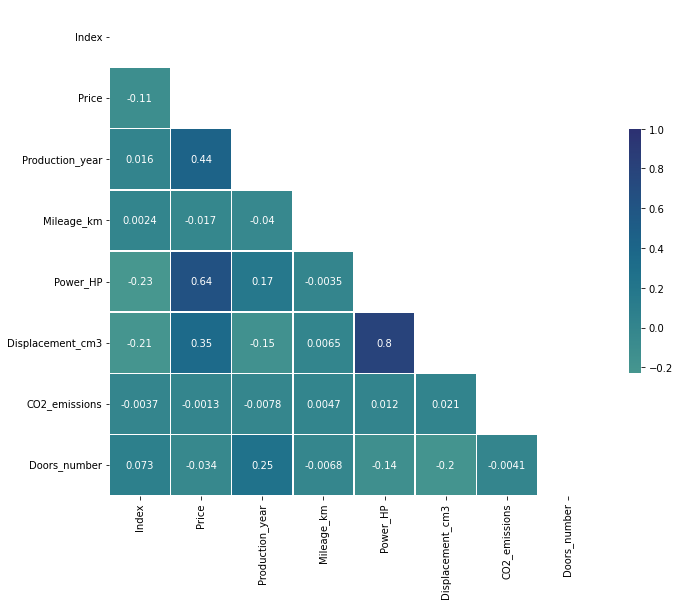

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="crest", vmax=1, center=0,
            annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": .5})


Outliers

Upon a scan of the data I noticed a few values that could be outliers especially in the mileage attribute - they were too low ( eg: 1 or 5 km)compared to an average of:

In [ ]:
df.Mileage_km.mean()

150249.81449708118

In [ ]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
detect_outlier(df.Mileage_km)

[11111111.0,
 10000000.0,
 99999999.0,
 1111111111.0,
 500000000.0,
 9999999.0,
 206549168.0,
 500000000.0]

In [ ]:
sorted(df.Mileage_km)
q1, q3= np.percentile(df.Mileage_km,[25,75])

In [ ]:
f"1st quartile: {q1} and 3rd quartile: {q3} "

'1st quartile: 53588.75 and 3rd quartile: 205697.5 '

In [ ]:
iqr = q3 - q1
print(iqr)

152108.75


In [ ]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 


In [ ]:
lower_bound

-174574.375

In [ ]:
upper_bound

433860.625

Apparently the calculations show that the low numbers are still within acceptable range and not outliers, so I will check for maximum outliers

In [ ]:
df.loc[df['Mileage_km']>491434.75]


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
261,261,11999,PLN,Used,Alfa Romeo,159,1.9JTDM Impression,NaN,2007,2025931.0,...,Manual,station_wagon,4.0,other,Germany,No,NaN,01/05/2021,"Płock, Mazowieckie","['ABS', 'Electric front windows', 'Passengers ..."
1552,1552,5000,PLN,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,...,Manual,station_wagon,5.0,green,NaN,No,NaN,02/05/2021,"Lubań, lubański, Dolnośląskie","['ABS', 'Central locking', 'Power steering', '..."
4577,4577,2950,PLN,Used,Audi,A4,Avant 1.9 TDI,B5 (1995-2001),1996,496000.0,...,Manual,station_wagon,5.0,silver,NaN,No,NaN,03/05/2021,"Toruń, Kujawsko-pomorskie","['ABS', 'Drivers airbag', 'Automatic air condi..."
4863,4863,13200,PLN,Used,Audi,A4,Avant 1.8T,B6 (2000-2004),2003,1234567.0,...,Manual,station_wagon,5.0,other,Germany,No,NaN,30/04/2021,"ul. Leśna 15 - 87-148 Łysomice, toruński, Kuja...","['ABS', 'Electric front windows', 'Drivers air..."
5503,5503,3399,PLN,Used,Audi,A4,NaN,B6 (2000-2004),2001,520000.0,...,Manual,sedan,5.0,other,NaN,No,NaN,25/04/2021,"Stary Brześć 23 B - 87-880 Brześć Kujawski, wł...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206796,206796,10900,PLN,Used,Volvo,V70,2.4,II (1999-2007),2004,495000.0,...,Manual,station_wagon,5.0,gray,NaN,No,NaN,30/04/2021,"Przasnyska 91a - 06-200 Maków Mazowiecki, mako...","['ABS', 'Electric front windows', 'Drivers air..."
207478,207478,9500,PLN,Used,Volvo,V70,2.4D Momentum,II (1999-2007),2007,550800.0,...,Manual,station_wagon,5.0,black,NaN,No,04/07/2007,04/05/2021,"Jemna, ząbkowicki, Dolnośląskie","['ABS', 'Electric front windows', 'Drivers air..."
208029,208029,15800,PLN,Used,Volvo,965,NaN,NaN,1991,1550000.0,...,Automatic,compact,5.0,white,NaN,No,NaN,30/04/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...","['Electric front windows', 'Passengers airbag'..."
208195,208195,12915,PLN,Used,Volvo,V70,II (1999-2007),II (1999-2007),2005,519450.0,...,Automatic,station_wagon,5.0,black,Germany,No,30/03/2005,29/04/2021,"Skarszewy, starogardzki, Pomorskie","['ABS', 'Electric front windows', 'Drivers air..."


The highest mileage:

In [ ]:
print(df['Mileage_km'].max())
print(df.Index[df['Mileage_km']==df['Mileage_km'].max()])

In [ ]:
fig = plt.figure(figsize =(7, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(sorted(df.Mileage_km))
 
plt.show()

In [ ]:
import statistics
statistics.variance(df.Mileage_km)

8587874802511.051

incredibly high variance - sign of extreme outliers in the data

In [ ]:
detect_outlier(df.Price)

[11111111.0,
 10000000.0,
 99999999.0,
 1111111111.0,
 500000000.0,
 9999999.0,
 206549168.0,
 500000000.0,
 385000,
 369000,
 399890,
 399890,
 399890,
 445890,
 389890,
 406540,
 410399,
 429900,
 523016,
 495239,
 466900,
 403900,
 429000,
 391062,
 405494,
 342900,
 389900,
 369000,
 342699,
 335450,
 330663,
 799000,
 1199900,
 349900,
 948900,
 599000,
 490700,
 949698,
 1267949,
 329900,
 339850,
 372819,
 400900,
 400900,
 400900,
 359900,
 458000,
 349900,
 339900,
 341736,
 477300,
 374450,
 444644,
 339900,
 354035,
 374400,
 364930,
 368396,
 430900,
 339900,
 349000,
 367930,
 331382,
 437360,
 441347,
 441347,
 326744,
 441347,
 327554,
 324896,
 324896,
 367050,
 396490,
 345388,
 324900,
 341100,
 340400,
 325000,
 327000,
 337894,
 329900,
 327677,
 337894,
 348700,
 358450,
 459131,
 326900,
 345000,
 325600,
 450192,
 332605,
 329900,
 450299,
 368623,
 329900,
 325900,
 379403,
 323649,
 379051,
 375654,
 375654,
 328600,
 332000,
 369900,
 379900,
 496500,
 429000,

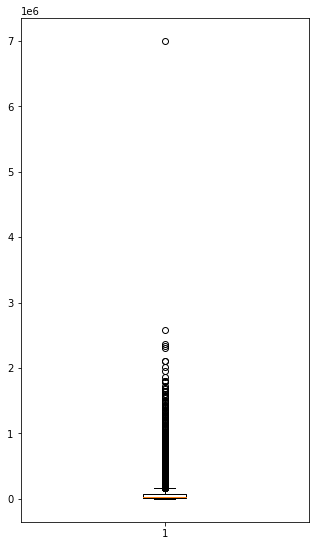

In [ ]:
fig = plt.figure(figsize =(4, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(sorted(df.Price))
 
plt.show()

In [ ]:
df.Price.max()

6999000

In [ ]:
most_exp = df[df['Price']==df.Price.max()]
most_exp.Vehicle_brand

32304    BMW
Name: Vehicle_brand, dtype: object

In [ ]:
statistics.variance(df.Price)

7509898870.706261

High variance could be attributed to the vast range of lower tier cars and luxury highend cars - but could also signal that many price listings might be exaggerated which significantly reduces their chances of being sold. i.e it will be wasting server space, especially if these cases are many

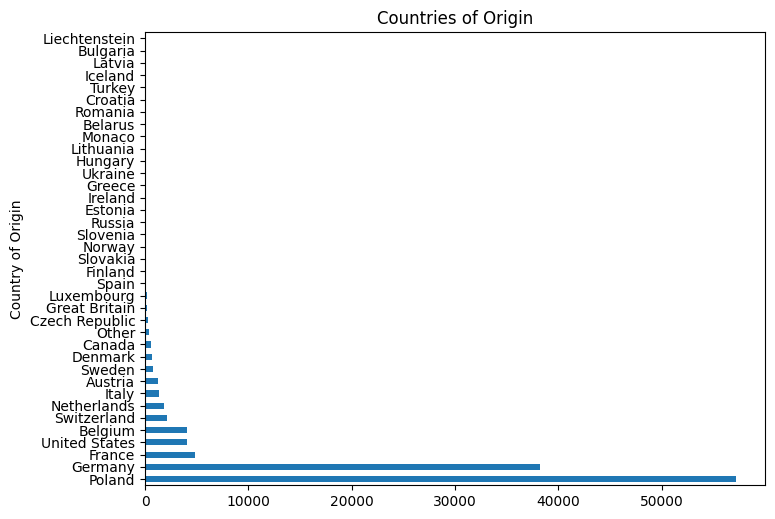

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
df.Origin_country.value_counts().plot(kind="barh", title="Countries of Origin", ylabel="Units", xlabel="Country of Origin")

A pie chart is a better more concise representation

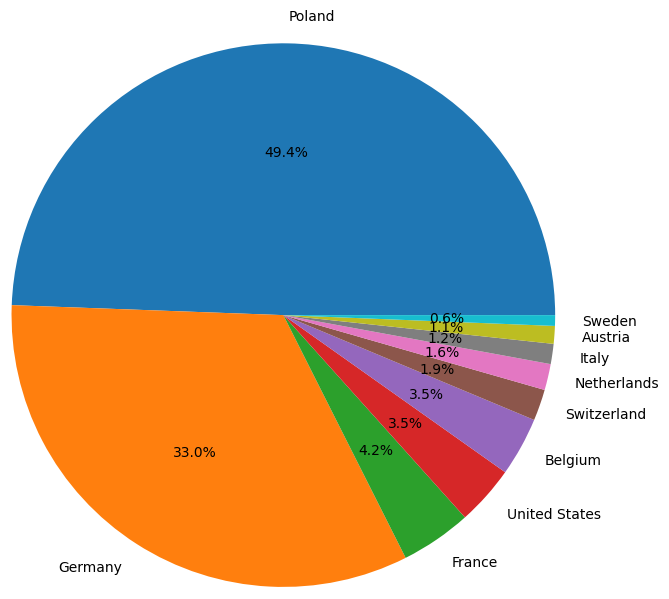

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df.Origin_country.value_counts()[:10].plot(kind="pie", autopct = '%1.1f%%', radius = 1.50, ylabel = "" "")


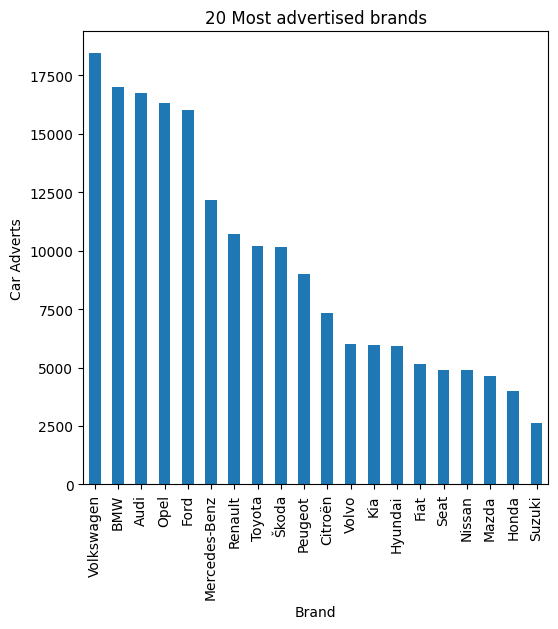

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
data = df['Vehicle_brand'].value_counts()[:20]
data.plot(kind='bar', title= "20 Most advertised brands", ylabel = "Car Adverts", xlabel="Brand")


There are 108 different brands advertised. German cars make up most of the cars advertized in the graph. 


In [ ]:
plt.figure(figsize=(10,6), dpi=200)
df.groupby(['Vehicle_brand']).mean().sort_values('Price', ascending = True)

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
Vehicle_brand,,,,,,,,
Daewoo,47560.083333,4.931652e+03,2000.871212,145902.106061,83.924242,1345.227273,168.147059,4.750000
Tavria,173509.500000,6.449500e+03,1990.500000,209606.500000,50.500000,1095.500000,NaN,3.000000
Rover,152781.870370,7.431722e+03,1996.333333,194877.092593,111.942308,1756.314815,163.571429,4.296296
Grecav,100857.500000,7.500000e+03,2004.000000,54650.000000,6.000000,505.000000,NaN,2.000000
Vauxhall,183840.500000,8.900000e+03,1964.000000,27263.000000,58.000000,1594.000000,NaN,4.500000
...,...,...,...,...,...,...,...,...
Ferrari,47975.000000,6.482693e+05,2009.634921,41015.126984,555.285714,4555.285714,343.727273,2.047619
Maybach,104961.333333,6.810000e+05,2015.000000,67266.666667,603.666667,5849.000000,NaN,4.666667
Rolls-Royce,152397.357143,9.354980e+05,1994.142857,100872.107143,404.851852,5982.178571,337.545455,3.392857


<Figure size 2000x1200 with 0 Axes>

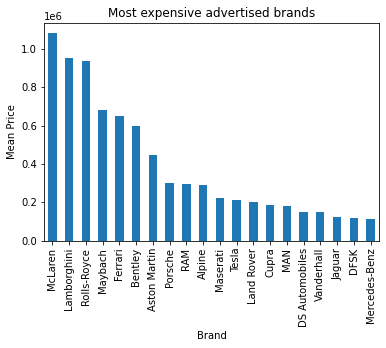

In [ ]:
price = df.groupby(['Vehicle_brand']).mean().sort_values('Price', ascending = False)[:20]['Price'].plot(kind="bar", title = "Most expensive advertised brands",xlabel = "Brand", ylabel= "Mean Price")

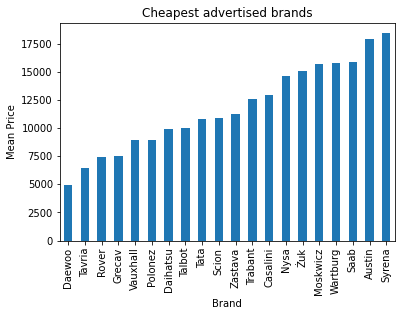

In [ ]:
price = df.groupby(['Vehicle_brand']).mean().sort_values('Price', ascending = True)[:20]['Price'].plot(kind="bar", title = "Cheapest advertised brands",xlabel = "Brand", ylabel= "Mean Price")

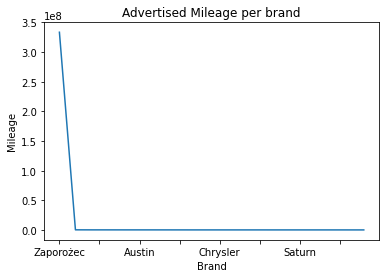

In [ ]:
mileage = df.groupby(['Vehicle_brand']).mean().sort_values('Mileage_km', ascending = False)[:20]['Mileage_km'].plot(kind="line",title="Advertised Mileage per brand", xlabel="Brand", ylabel="Mileage")

The Zaporozen value seems to be an extreme outlier

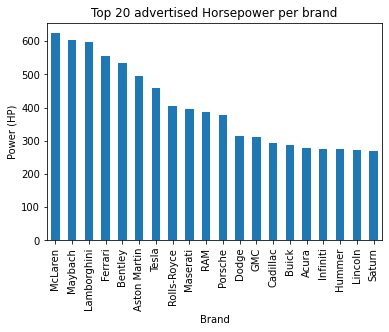

In [ ]:
power = df.groupby(['Vehicle_brand']).mean().sort_values('Power_HP', ascending = False)[:20]['Power_HP'].plot(kind="bar", title="Top 20 advertised Horsepower per brand",xlabel = "Brand", ylabel= "Power (HP)")

which day had the most offers posted? and how many offers were there

In [ ]:
df.Offer_publication_date.mode()

0    03/05/2021
dtype: object

In [ ]:
df.loc[df['Offer_publication_date']=='03/05/2021']['Index'].count()


26561

In [ ]:
df['Offer_publication_date'] = pd.to_datetime(df['Offer_publication_date'])
df.groupby(df.Offer_publication_date.dt.month)['Index'].count() 


Offer_publication_date
1      24631
2      26148
3      26570
4     130842
5         41
6         11
7         13
8          9
9          8
10        11
11         8
12        12
Name: Index, dtype: int64

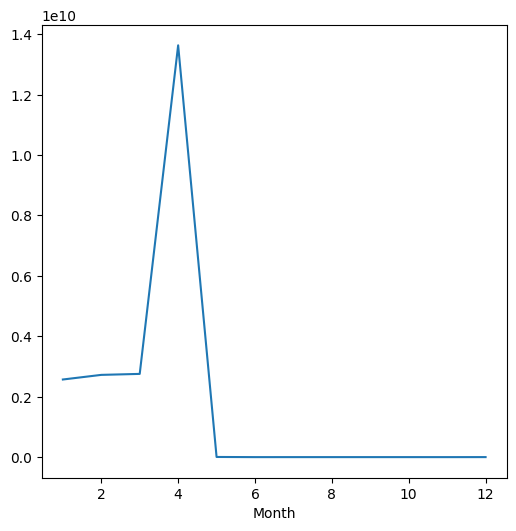

In [ ]:
data = df.groupby(df.Offer_publication_date.dt.month)['Index'].sum() 
plt.figure(figsize=(6,6), dpi=100)
data.plot(kind="line", xlabel="Month")

The first four months, especially April, are the most active months. The rest of the year beginning with May experienced extreme inactivity

Which location had the most offers and how many are they?

In [ ]:
df.Offer_location.mode()

0    Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)
dtype: object

In [ ]:
df.loc[df['Offer_location']=='Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)']['Index'].count()

1329

In [ ]:
m = df.filter(items = ['Transmission', 'Production_year','Price'])
trans = ['Manual']
m[m['Transmission'].isin(trans)]

,Transmission,Production_year,Price
0,Manual,2021,86200
1,Manual,1974,43500
3,Manual,2012,39900
4,Manual,2021,97900
5,Manual,2016,62950
...,...,...,...
208299,Manual,2014,39900
208300,Manual,1970,10900
208301,Manual,1977,6900
208302,Manual,1986,5700


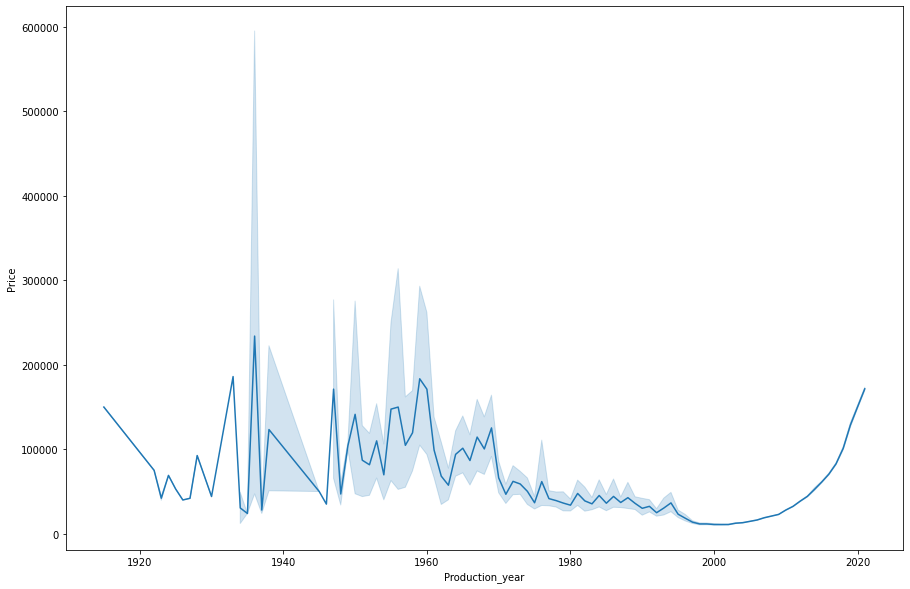

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(data = m, x = df.Production_year, y = df.Price)

We can see that the prices of manual cars from the year 2000 to 2010 is lower than the prices from 2010 to 2020 which closely resemble the prices of the 1960s the more we move towards 2020, therefore our hypothesis has been rejected